In [1]:
import cv2

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [68]:
filepath = '../assets/img/alittlebitofphysicalart.png'
img = cv2.imread(filepath)

# add alpha channel and make white transparent
b_channel, g_channel, r_channel = cv2.split(img)
alpha_channel = np.ones(b_channel.shape, dtype=b_channel.dtype) * 255
img_BGRA = cv2.merge((b_channel, g_channel, r_channel, alpha_channel))

# make white transparent
img_BGRA[np.all(img_BGRA == [255, 255, 255, 255], axis=2)] = [255, 255, 255, 0]


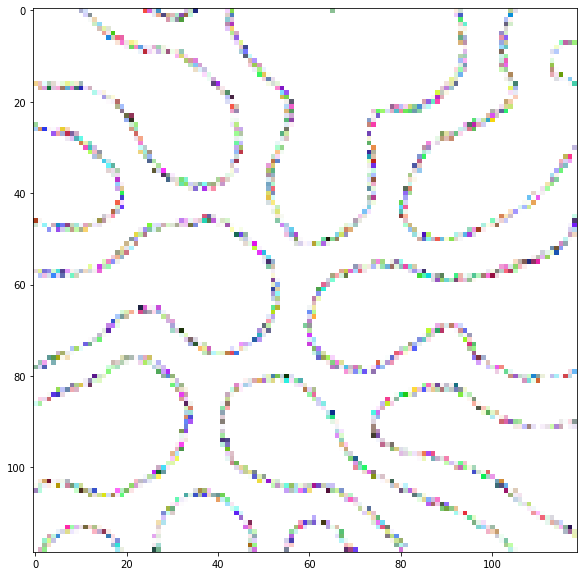

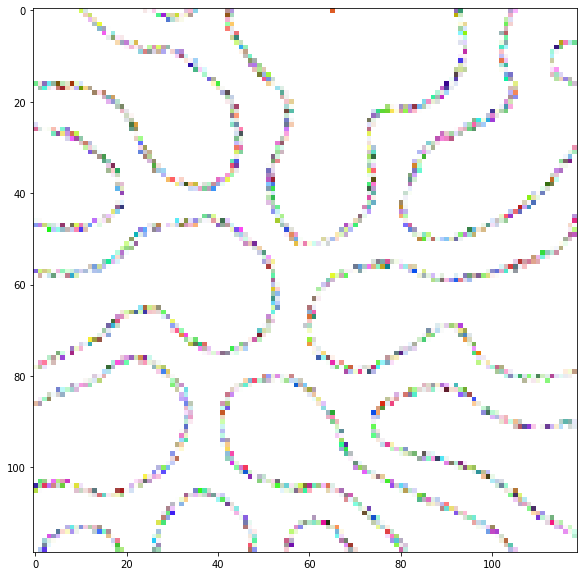

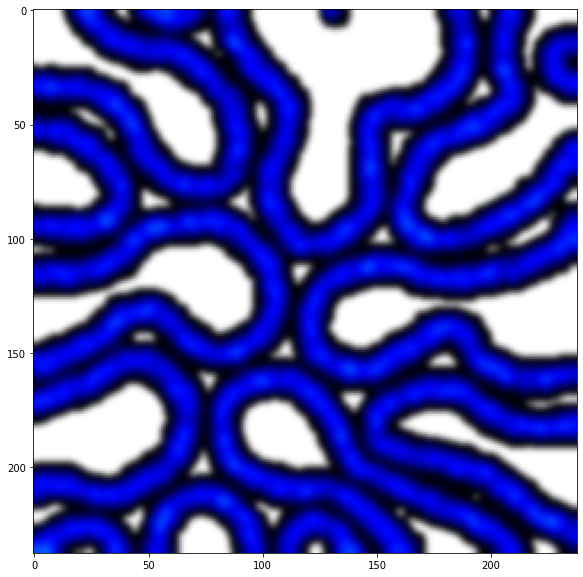

In [162]:
# create random rainbow image with same shape as img_BGRA
img_rainbow = np.random.randint(0, 255, img_BGRA.shape, dtype=np.uint8)

# filter out non black pixels
img_rainbow[np.all(img_BGRA == [255, 255, 255, 0], axis=2)] = [0, 0, 0, 0]

# plot
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(img_rainbow)

# more cool effects like transforming black to some random color

# # resize to larger image
img_rainbow = cv2.resize(img_rainbow, (img_BGRA.shape[0]*2, img_BGRA.shape[1]*2))

# smoothl out the edges
img_rainbow = cv2.GaussianBlur(img_rainbow, (5, 5), 0)



# add spatial gaussian noise where there is non transparent pixels
noise = np.random.normal(0, 5, img_rainbow.shape)
img_rainbow[np.all(img_rainbow != [0, 0, 0, 0], axis=2)] = noise[np.all(img_rainbow != [0, 0, 0, 0], axis=2)]

# convolve the colors
kernel = np.ones((5, 5), np.float32)/25
img_rainbow = cv2.filter2D(img_rainbow, -1, kernel)


img_rainbow = cv2.GaussianBlur(img_rainbow, (3, 3), 0)

# group colors to most common from a 5x5 window only non transparent pixels

kernel = np.ones((5, 5), np.float32)/25
img_rainbow = cv2.filter2D(img_rainbow, -1, kernel)


# capture all pixels that are transparent
# loop through all pixels and if pixel is transparent add to list
transparent_pixels = []
for i in range(img_rainbow.shape[0]):
    for j in range(img_rainbow.shape[1]):
        if img_rainbow[i, j, 3] == 0:
            transparent_pixels.append((i, j))




img_rainbow = cv2.cvtColor(img_rainbow, cv2.COLOR_BGRA2BGR)
img_rainbow = cv2.applyColorMap(img_rainbow, cv2.COLORMAP_HOT)
# convert back to BGRA
img_rainbow = cv2.cvtColor(img_rainbow, cv2.COLOR_BGR2BGRA)

# add back transparent pixels
for pixel in transparent_pixels:
    img_rainbow[pixel[0], pixel[1]] = [0, 0, 0, 0]



# blend the colors
img_rainbow = cv2.GaussianBlur(img_rainbow, (5, 5), 0)


# scale the colors to be more vibrant
# img_rainbow = img_rainbow * 1.5

img_rainbow = cv2.GaussianBlur(img_rainbow, (5, 5), 0)



# map colors to modern color palette




# show image
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(img_rainbow)


In [163]:
# convert to RGB
img_rainbow = cv2.cvtColor(img_rainbow, cv2.COLOR_BGRA2RGBA)

# save image
cv2.imwrite('../assets/img/favicon.png', img_rainbow)

True

In [ ]:
# convert image to favicon
import favicon
favicon.make('../assets/img/favicon.png', sizes=[(32, 32), (64, 64), (128, 128), (256, 256), (512, 512)])

In [136]:
# set any transparent pixels to white

transparent_pixels = np.all(img_rainbow == [0, 0, 0], axis=2)

In [138]:
img_rainbow[:m:2]

NameError: name 'm' is not defined

In [46]:

# save as png
cv2.imwrite('../assets/img/favicon.png', img_BGRA)

True